# Actividad 4 - Autómatas Celulares

Erendira Robles Bustamante

Instruccuiones: Tome una fotografía a color, conviértala en una fotografía en tonos grises. Ahora, tome cada
pixel de la fotografía en grises y cada pixel de la fotografía a color. Aplique una vecindad de Moore
de 9 vecinos al pixel gris y obtenga la regla para predecir el pixel a color. Guarde todas las reglas
encontradas y con base en esas reglas, vuelva a generar la fotografía a color. Ahora, tome una foto
antigua de su casa y conviértala a color con base en las reglas que encontraron.

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


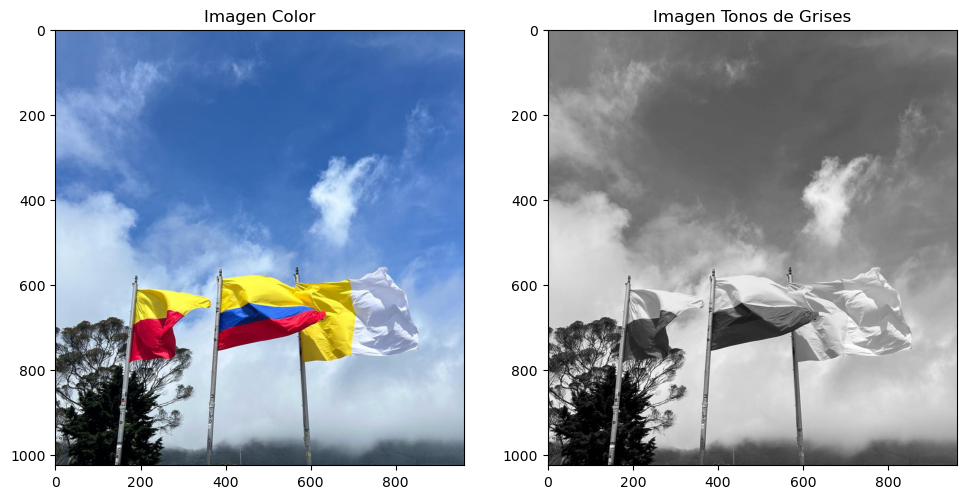

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Abre la imagen original en color
imagen_color = Image.open("img_color.jpg")

# Convierte la imagen original en color a escala de grises
imagen_gris = imagen_color.convert("L")

# Muestra las imágenes en una ventana de matplotlib
plt.figure(figsize=(10, 5))

# Subtrama 1: Imagen en color
plt.subplot(1, 2, 1)
plt.imshow(imagen_color)
plt.title("Imagen Color")

# Subtrama 2: Imagen en tonos de grises
plt.subplot(1, 2, 2)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Imagen Tonos de Grises")

# Ajusta el espacio entre las imágenes
plt.tight_layout()

# Muestra las imágenes
plt.show()

# Cierra la imagen original
imagen_color.close()


In [4]:
pip install pillow matplotlib

Note: you may need to restart the kernel to use updated packages.


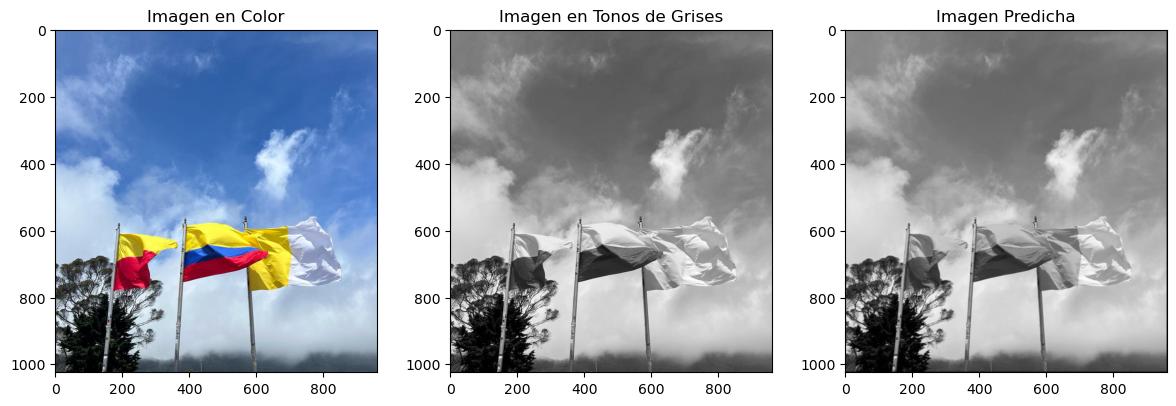

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Abre la imagen en color
imagen_color = Image.open("img_color.jpg")
imagen_color_array = np.array(imagen_color)

# Abre la imagen en tonos de grises
imagen_gris = Image.open("img_gris.jpg")
imagen_gris_array = np.array(imagen_gris)

# Obtiene las dimensiones de la imagen
ancho, alto = imagen_gris.size

# Función para predecir el valor del píxel en color a partir de la vecindad de Moore
def predecir_color(x, y):
    # Obtiene los valores de los píxeles vecinos en la imagen en color
    vecindad = imagen_color_array[y - 1:y + 2, x - 1:x + 2]
    
    # Calcula la media de los valores de los píxeles vecinos para predecir el valor del píxel en color
    valor_predicho = np.mean(vecindad)
    
    return int(valor_predicho)

# Crea una nueva imagen en color con los píxeles predichos
imagen_predicha = np.zeros_like(imagen_color_array)

for y in range(1, alto - 1):
    for x in range(1, ancho - 1):
        # Obtiene el valor predicho del píxel en color
        valor_color_predicho = predecir_color(x, y)
        
        # Asigna el valor predicho al píxel en la imagen predicha
        imagen_predicha[y, x] = valor_color_predicho

# Convierte la matriz resultante en una imagen PIL
imagen_predicha = Image.fromarray(imagen_predicha.astype('uint8'))

# Muestra las imágenes en una ventana de matplotlib
plt.figure(figsize=(12, 4))

# Subtrama 1: Imagen en color original
plt.subplot(1, 3, 1)
plt.imshow(imagen_color)
plt.title("Imagen en Color")

# Subtrama 2: Imagen en tonos de grises
plt.subplot(1, 3, 2)
plt.imshow(imagen_gris, cmap='gray')
plt.title("Imagen en Tonos de Grises")

# Subtrama 3: Imagen predicha
plt.subplot(1, 3, 3)
plt.imshow(imagen_predicha, cmap='gray')
plt.title("Imagen Predicha")

# Ajusta el espacio entre las imágenes
plt.tight_layout()

# Muestra las imágenes
plt.show()

# Cierra las imágenes originales
imagen_color.close()
imagen_gris.close()



